<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ARTIFACT-challenge-N3" data-toc-modified-id="ARTIFACT-challenge-N3-1">ARTIFACT challenge N3</a></span><ul class="toc-item"><li><span><a href="#input-quantities" data-toc-modified-id="input-quantities-1.1">input quantities</a></span></li><li><span><a href="#search--for-solution" data-toc-modified-id="search--for-solution-1.2">search  for solution</a></span></li></ul></li><li><span><a href="#ARTIFACT-challenge-N1" data-toc-modified-id="ARTIFACT-challenge-N1-2">ARTIFACT challenge N1</a></span></li><li><span><a href="#ARTIFACT-challenge-N2" data-toc-modified-id="ARTIFACT-challenge-N2-3">ARTIFACT challenge N2</a></span></li></ul></div>

In [3]:
import numpy as np
import math
import os
import random
import re
import sys
import networkx as nx


In [2]:
from itertools import permutations
# import multiprocessing as mp

##  input quantities 

define network

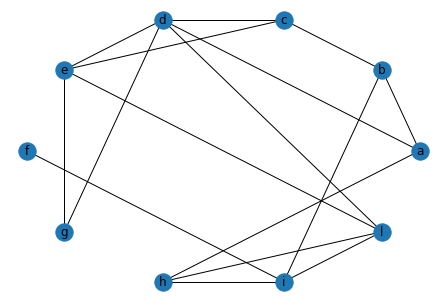

In [3]:
nx_dict = {'a': ['b', 'd', 'h'],
           'b': ['a', 'i', 'c'],
           'c': ['b', 'd', 'e'],
           'd': ['a', 'c', 'g', 'e', 'l'],
           'e': ['c', 'd', 'g', 'l'],
           'f': ['i'],
           'g': ['d', 'e'],
           'h': ['a', 'l', 'i'],
           'i': ['b', 'f', 'h', 'l'],
           'l': ['e', 'd', 'h', 'i']}

artifact_net = nx.from_dict_of_lists(nx_dict)

nx.draw_circular(artifact_net, with_labels=True)

define sums dict

In [4]:
sum_list = [13, 36, 11, 23, 20, 8, 4, 24, 10, 19]
sum_dict = {i: s for i, s in zip(range(1, 11), sum_list)}
sum_dict

{1: 13, 2: 36, 3: 11, 4: 23, 5: 20, 6: 8, 7: 4, 8: 24, 9: 10, 10: 19}

## search  for solution

In [97]:
c = 1e5

for p in permutations(range(1, artifact_net.number_of_nodes() + 1)):
# while c > 0:
#     p = np.random.permutation(10) + 1

# def find_perm(p):

    # assign num to node, as attribute
    attr_dict = {k: n for k, n in zip(artifact_net.nodes(), p)}
    nx.set_node_attributes(artifact_net, attr_dict, 'number')

    # sum checks
    for i in range(1, artifact_net.number_of_nodes() + 1):
        my_node = [n for n in artifact_net.nodes() if artifact_net.nodes[n]['number'] == i][0]
        artifact_net.nodes[my_node]['check'] = sum(
            [artifact_net.nodes[n]['number'] for n in artifact_net.neighbors(my_node)]) == sum_dict[i]

#     print(nx.get_node_attributes(artifact_net, 'number'))
#     print(nx.get_node_attributes(artifact_net, 'check'))

#     if sum(nx.get_node_attributes(artifact_net, 'check').values()) == artifact_net.number_of_nodes():
#         print(nx.get_node_attributes(artifact_net, 'check'))
#         print(nx.get_node_attributes(artifact_net, 'number'))
#         print('the result of the exercise is:')
#         print(artifact_net.nodes['h']['number'] + artifact_net.nodes['i']['number'] + artifact_net.nodes['l']['number'])
#         return nx.get_node_attributes(artifact_net,'number')

    if sum(nx.get_node_attributes(artifact_net, 'check').values()) > 7:
        print(nx.get_node_attributes(artifact_net, 'check'))
        print(nx.get_node_attributes(artifact_net,'number'))
#         break
#         return nx.get_node_attributes(artifact_net,'number')
#     else:
#         return None

    # just loop control
#     c -= 1
#     if c == 0:

#         break

{'a': True, 'b': True, 'c': True, 'd': True, 'e': True, 'f': True, 'g': True, 'h': True, 'i': True, 'l': True}
{'a': 6, 'b': 1, 'c': 3, 'd': 2, 'e': 8, 'f': 7, 'g': 9, 'h': 5, 'i': 4, 'l': 10}


define solution netw

In [100]:
solu_check = {'a': True, 'b': True, 'c': True, 'd': True, 'e': True, 'f': True, 'g': True, 'h': True, 'i': True, 'l': True}
solu_number = {'a': 6, 'b': 1, 'c': 3, 'd': 2, 'e': 8, 'f': 7, 'g': 9, 'h': 5, 'i': 4, 'l': 10}

nx.set_node_attributes(artifact_net, solu_number, 'number')
nx.set_node_attributes(artifact_net, solu_check, 'check')

draw solution netw

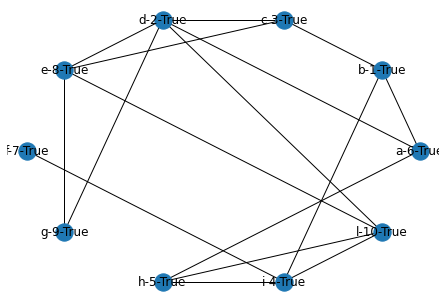

In [105]:
labels = {k: '-'.join([k, str(n), str(c)]) for (k, c, n) in zip(nx.get_node_attributes(artifact_net, 'number').keys(),
                                                        nx.get_node_attributes(artifact_net, 'check').values(),
                                                        nx.get_node_attributes(artifact_net, 'number').values())}

nx.draw_circular(artifact_net, labels=labels)

compute riddle result

In [107]:
sum([artifact_net.nodes[i]['number'] for i in ['h','i','l'] ])

19